In [1]:
%matplotlib notebook
import sys
sys.path.append('../source/')
from trader import Trader
from entrymodels import RSIN
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as pl

# VIVT3 - Optimising params

**Best results**: RSI:s0-rsi:17
Period: 2016-01-01 -> 2021-06-11\
Avg time in: 5.6 days\
pnl: 247% in 98 trades\
Winning rate: 77%

#### Account
**Capital**: 20000 \
**Risk**: Capital \
**Fees**: 4.0 \
\
**Equity**: B3SA3 \
**Period**: $1^{st}$ Jan 2016\
**Trading Strategy**: RSI2 \
**Entry point**: BO on signal bar or B high. \
**Stop loss**: Under C with tested factors (1, 1.2, 1.3, 1.4, 1.5) \
**Target**: Tested - AB projection with different factors or risk projection with factors (2, 3, 4)\
**Trail**: Tested - No or Raised to BE after price reach 2:1 on RR 

In [55]:
stopPos = [1, 1.4, 1.5]
rsiLimits = [15, 16, 19, 20, 21, 24]
end = datetime.today()
start = datetime(day=1, month=6, year=2020)

Trader.loadportfolio(portfolio=['VIVT3.SA'], start=start, end=end)

trader = {}
summary = pd.DataFrame()
history = pd.DataFrame()
for stop in stopPos:
    stopType = 'proportional' if stop > 0 else None
    RSIN.settings({
        'name': f'RSI-s:{stop}-rsi:{20}',
        'selectCriteria': None,
        'rsiLimit': 20,
        'stop': {'type': stopType, 'factor': stop}
    })
    trader[RSIN.name] = Trader()
    trader[RSIN.name].new(risk_size=0, target_size=0, capital=20000, fees=4.0)
    trader[RSIN.name].backtest(RSIN, updaterisk=False, trail=False)

    summary = summary.append(pd.DataFrame(trader[RSIN.name].summary()).T)
    history = history.append(trader[RSIN.name].history())

for rsi in rsiLimits:
    RSIN.settings({
        'name': f'RSI-s:{0}-rsi:{rsi}',
        'selectCriteria': None,
        'rsiLimit': rsi,
        'stop': {'type': None, 'factor': 0}
    })
    trader[RSIN.name] = Trader()
    trader[RSIN.name].new(risk_size=0, target_size=0, capital=20000, fees=4.0)
    trader[RSIN.name].backtest(RSIN, updaterisk=False, trail=False)

    summary = summary.append(pd.DataFrame(trader[RSIN.name].summary()).T)
    history = history.append(trader[RSIN.name].history())

    
summary.reset_index(inplace=True, drop=True)  


VIVT3.SA: 100%|██████████| 1/1 [00:00<00:00,  1.25ticker/s]


2020-06-03 00:00:00: VIVT3.SA entry=47.0, stop=44.74, target=48.46, vol=400
Profit!
2020-06-08 00:00:00: VIVT3.SA price=48.12
2020-06-23 00:00:00: VIVT3.SA entry=49.24, stop=47.92, target=50.55, vol=400
Profit!
2020-06-26 00:00:00: VIVT3.SA price=49.56
2020-06-29 00:00:00: VIVT3.SA entry=48.18, stop=47.04, target=49.56, vol=400
Profit!
2020-07-03 00:00:00: VIVT3.SA price=48.82
2020-07-14 00:00:00: VIVT3.SA entry=47.9, stop=47.17, target=48.99, vol=400
Profit!
2020-07-16 00:00:00: VIVT3.SA price=48.73
2020-07-23 00:00:00: VIVT3.SA entry=49.77, stop=46.24, target=52.95, vol=400
Profit!
2020-07-28 00:00:00: VIVT3.SA price=50.8
2020-08-05 00:00:00: VIVT3.SA entry=50.05, stop=48.84, target=51.59, vol=400
Profit!
2020-08-10 00:00:00: VIVT3.SA price=51.57
2020-08-12 00:00:00: VIVT3.SA entry=49.5, stop=47.48, target=52.1, vol=400
Profit!
2020-08-24 00:00:00: VIVT3.SA price=49.79
2020-08-26 00:00:00: VIVT3.SA entry=49.3, stop=47.97, target=50.2, vol=400
Profit!
2020-09-03 00:00:00: VIVT3.SA pri

In [56]:
summary

,period,strategy,avg_time_in,total_trades,open_trades,pnl,pnl_percent,batting_avg,sharpe,liquid_cap,total_cap
0,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:1-rsi:20],4.42857,29,1,1766,8.83,0.714286,0.620888,3598,21766
1,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:1.4-rsi:20],4.7037,28,1,1997,9.985,0.777778,0.465083,3829,21997
2,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:1.5-rsi:20],4.74074,28,1,2917,14.585,0.814815,0.498753,207,22917
3,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:0-rsi:15],4.7619,21,0,4131,20.655,0.857143,0.669956,24131,24131
4,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:0-rsi:16],4.91304,23,0,4383,21.915,0.869565,0.630592,24383,24383
5,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:0-rsi:19],5.28,26,1,4331,21.655,0.84,0.771429,1621,24331
6,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:0-rsi:20],5.23077,27,1,3974,19.87,0.846154,0.690653,1264,23974
7,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:0-rsi:21],5.61538,27,1,3263,16.315,0.807692,0.729807,553,23263
8,"[2020-06-01 00:00:00, 2021-06-18 00:00:00]",[RSI-s:0-rsi:24],5.32143,29,1,4186,20.93,0.785714,0.892845,1406,24116


<IPython.core.display.Javascript object>


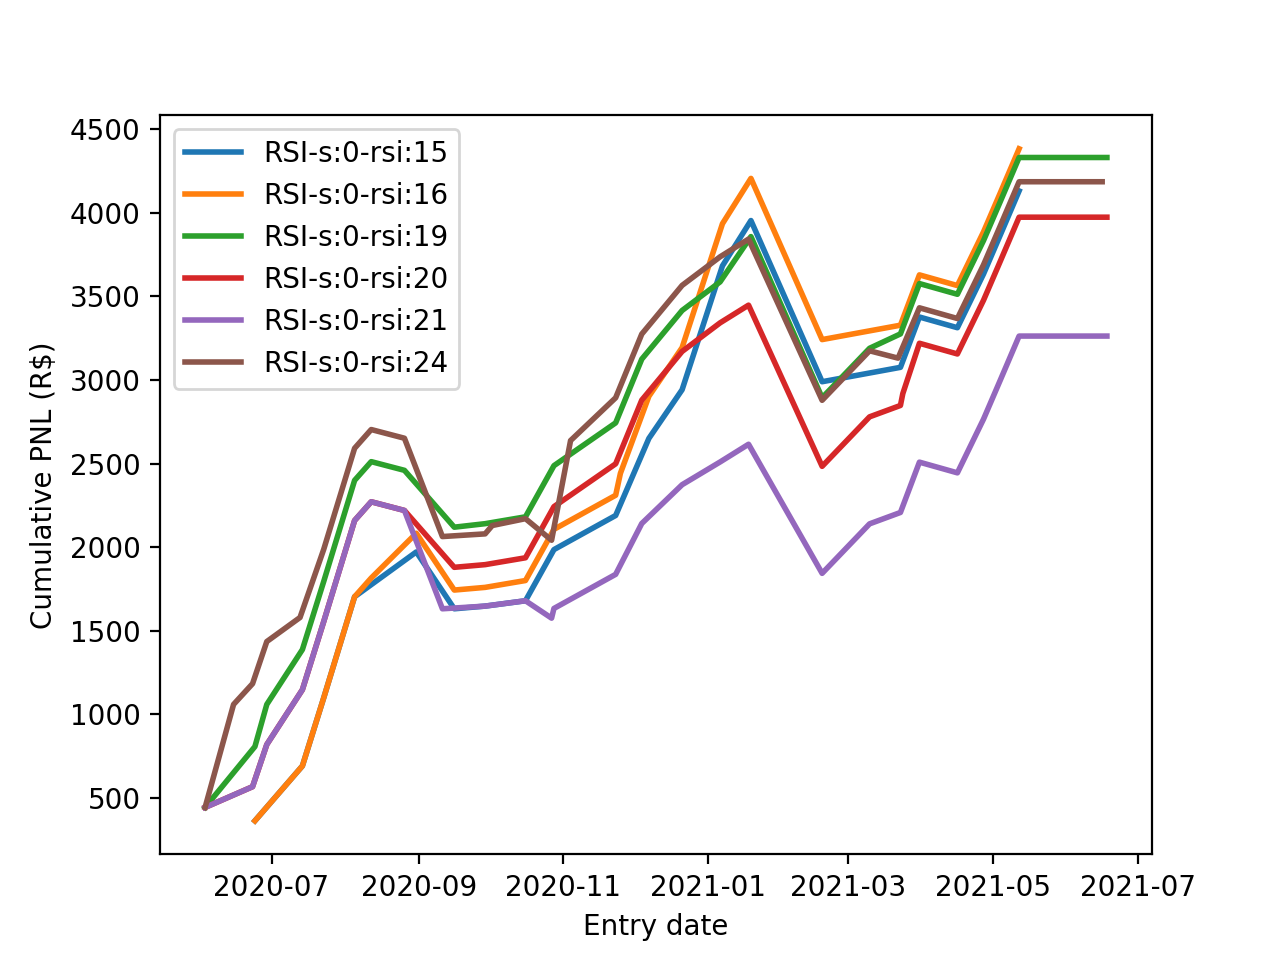

In [57]:
fig, ax = pl.subplots()
for r in rsiLimits:
    results = history[history['strategy']==f'RSI-s:{0}-rsi:{r}'].copy()
    ax.plot(
        results['entry_date'],
        results['pnl'].cumsum().fillna(method='ffill'),
        label=f'RSI-s:{0}-rsi:{r}',
        linestyle='-',
        lw=2,
#         color=colours[cnt % len(colours)]
    )
ax.set_ylabel('Cumulative PNL (R$)')
ax.legend()
ax.set_xlabel('Entry date')
pl.show()

<IPython.core.display.Javascript object>


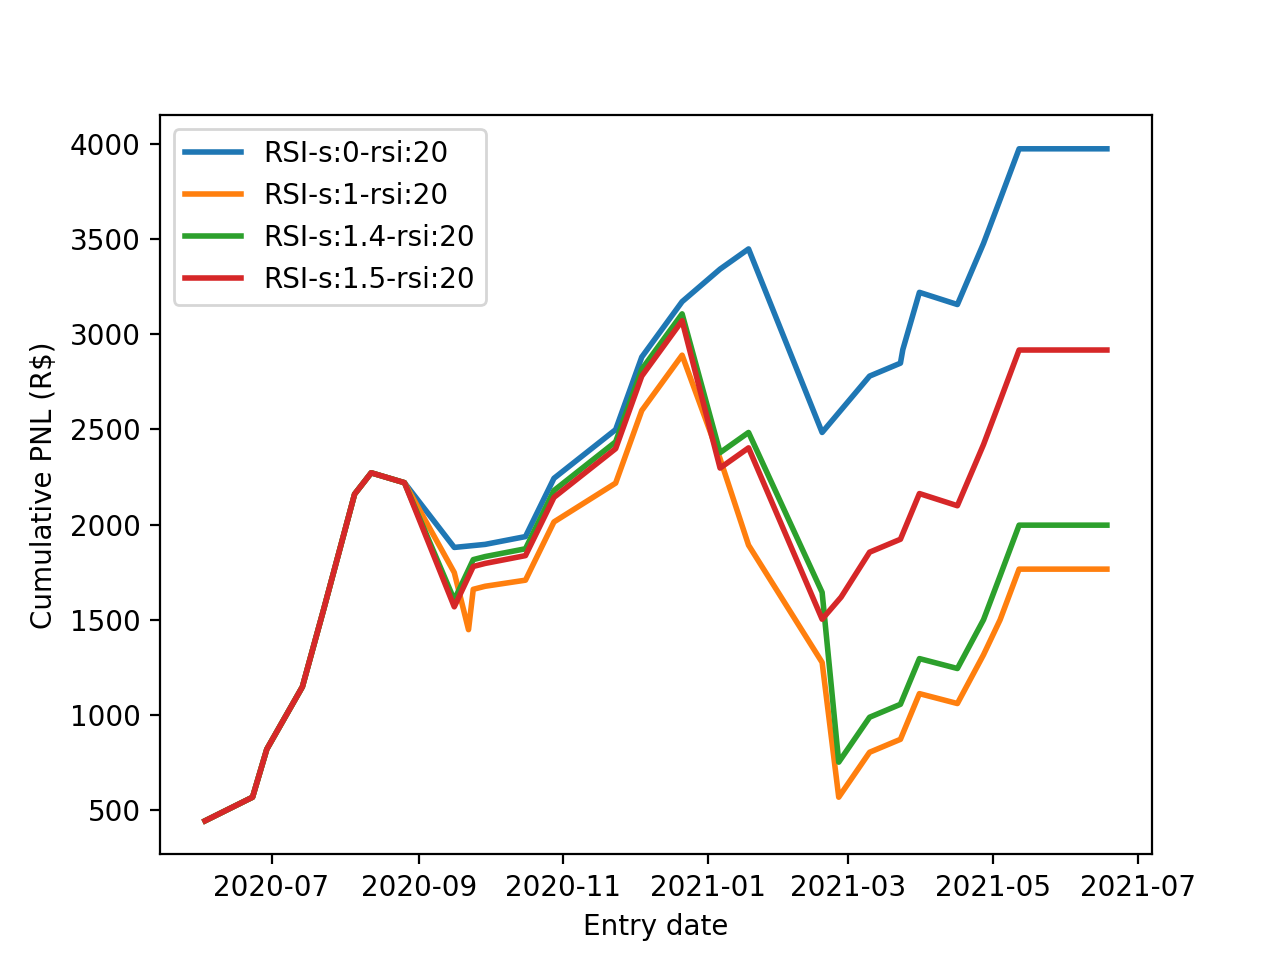

In [58]:
fig, ax = pl.subplots()
for s in [0] + stopPos:
    results = history[history['strategy']==f'RSI-s:{s}-rsi:{20}'].copy()
    ax.plot(
        results['entry_date'],
        results['pnl'].cumsum().fillna(method='ffill'),
        label=f'RSI-s:{s}-rsi:{20}',
        linestyle='-',
        lw=2,
#         color=colours[cnt % len(colours)]
    )
ax.set_ylabel('Cumulative PNL (R$)')
ax.legend()
ax.set_xlabel('Entry date')
pl.show()

In [260]:
trader[RSIN.name].history()

,entry_date,strategy,ticker,entry,entry_vol,stop,target,status,exit,exit_vol,pnl,exit_date,time_in
0,2016-01-08,RSI-N,VIVT3.SA,28.98,300,0.01,29.61,sold,29.61,-300,185,2016-01-13 00:00:00,5 days
1,2016-02-24,RSI-N,VIVT3.SA,31.50,300,0.01,32,sold,32,-300,146,2016-02-26 00:00:00,2 days
2,2016-04-01,RSI-N,VIVT3.SA,37.71,200,0.01,36.23,sold,36.23,-200,-300,2016-04-08 00:00:00,7 days
3,2016-04-25,RSI-N,VIVT3.SA,35.16,200,0.01,35.96,sold,36.32,-200,228,2016-04-27 00:00:00,2 days
4,2016-05-05,RSI-N,VIVT3.SA,35.39,200,0.01,36.01,sold,36.1,-200,138,2016-05-09 00:00:00,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2021-03-31,RSI-N,VIVT3.SA,44.23,700,0.01,44.84,sold,44.84,-700,423,2021-04-07 00:00:00,7 days
104,2021-04-16,RSI-N,VIVT3.SA,44.14,700,0.01,44.02,sold,44.02,-700,-88,2021-04-23 00:00:00,7 days
105,2021-04-27,RSI-N,VIVT3.SA,42.95,800,0.01,43.6,sold,43.6,-800,516,2021-04-29 00:00:00,2 days
106,2021-05-04,RSI-N,VIVT3.SA,42.76,800,0.01,43.23,sold,43.23,-800,372,2021-05-06 00:00:00,2 days


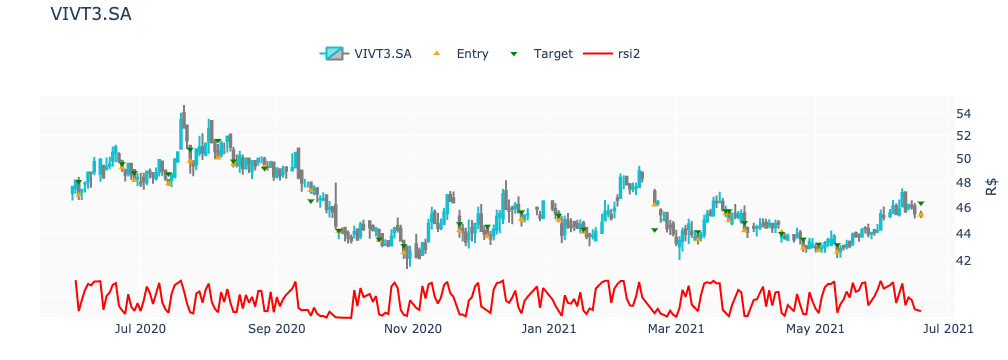

In [59]:
trader[f'RSI-s:{0}-rsi:{20}'].plottrades('VIVT3.SA', indicator='rsi2')

In [60]:
end = datetime.today()
start = datetime(day=1, month=1, year=2016)

Trader.loadportfolio(portfolio=['B3SA3.SA', 'VIVT3.SA', 'GNDI3.SA'], start=start, end=end)
RSIN.settings({
    'name': f'RSI-s:{0}-rsi:{17}',
    'selectCriteria': None,
    'rsiLimit': 17,
    'stop': {'type': None, 'factor': 0}
})
trader = Trader()
trader.new(risk_size=0, target_size=0, capital=20000, fees=4.0)
trader.backtest(RSIN, updaterisk=False, trail=False)


TRPL4.SA: 100%|██████████| 4/4 [00:03<00:00,  1.09ticker/s]
../source/entrymodels.py:350: RuntimeWarning:

divide by zero encountered in true_divide

../source/entrymodels.py:350: RuntimeWarning:

invalid value encountered in true_divide



2016-01-06 00:00:00: TRPL4.SA entry=10.96, stop=0.01, target=11.37, vol=1800
Profit!
2016-01-11 00:00:00: TRPL4.SA price=10.94
2016-01-15 00:00:00: TRPL4.SA entry=10.74, stop=0.01, target=11.18, vol=1800
2016-01-21 00:00:00: B3SA3.SA entry=3.36, stop=0.01, target=3.5, vol=100
Profit!
2016-01-22 00:00:00: TRPL4.SA price=10.41
2016-01-26 00:00:00: B3SA3.SA entry=3.32, stop=0.01, target=3.41, vol=5700
Profit!
2016-01-27 00:00:00: B3SA3.SA price=3.41
Profit!
2016-01-27 00:00:00: B3SA3.SA price=3.41
2016-02-12 00:00:00: B3SA3.SA entry=3.38, stop=0.01, target=3.43, vol=5800
Profit!
2016-02-15 00:00:00: B3SA3.SA price=3.44
2016-02-24 00:00:00: VIVT3.SA entry=31.5, stop=0.01, target=32.52, vol=600
2016-02-24 00:00:00: TRPL4.SA entry=11.43, stop=0.01, target=11.73, vol=100
Profit!
2016-02-25 00:00:00: TRPL4.SA price=11.73
Profit!
2016-02-26 00:00:00: VIVT3.SA price=32.0
2016-03-24 00:00:00: TRPL4.SA entry=12.04, stop=0.01, target=12.43, vol=1700
Profit!
2016-04-08 00:00:00: TRPL4.SA price=11.97

In [61]:
trader.summary()

period          [2016-01-04 00:00:00, 2021-06-18 00:00:00]
strategy                                  [RSI-s:0-rsi:17]
avg_time_in                                        5.62288
total_trades                                           237
open_trades                                              1
pnl                                                 114251
pnl_percent                                        571.255
batting_avg                                       0.758475
sharpe                                            0.945997
liquid_cap                                             151
total_cap                                           133551
Name: summary, dtype: object

<IPython.core.display.Javascript object>


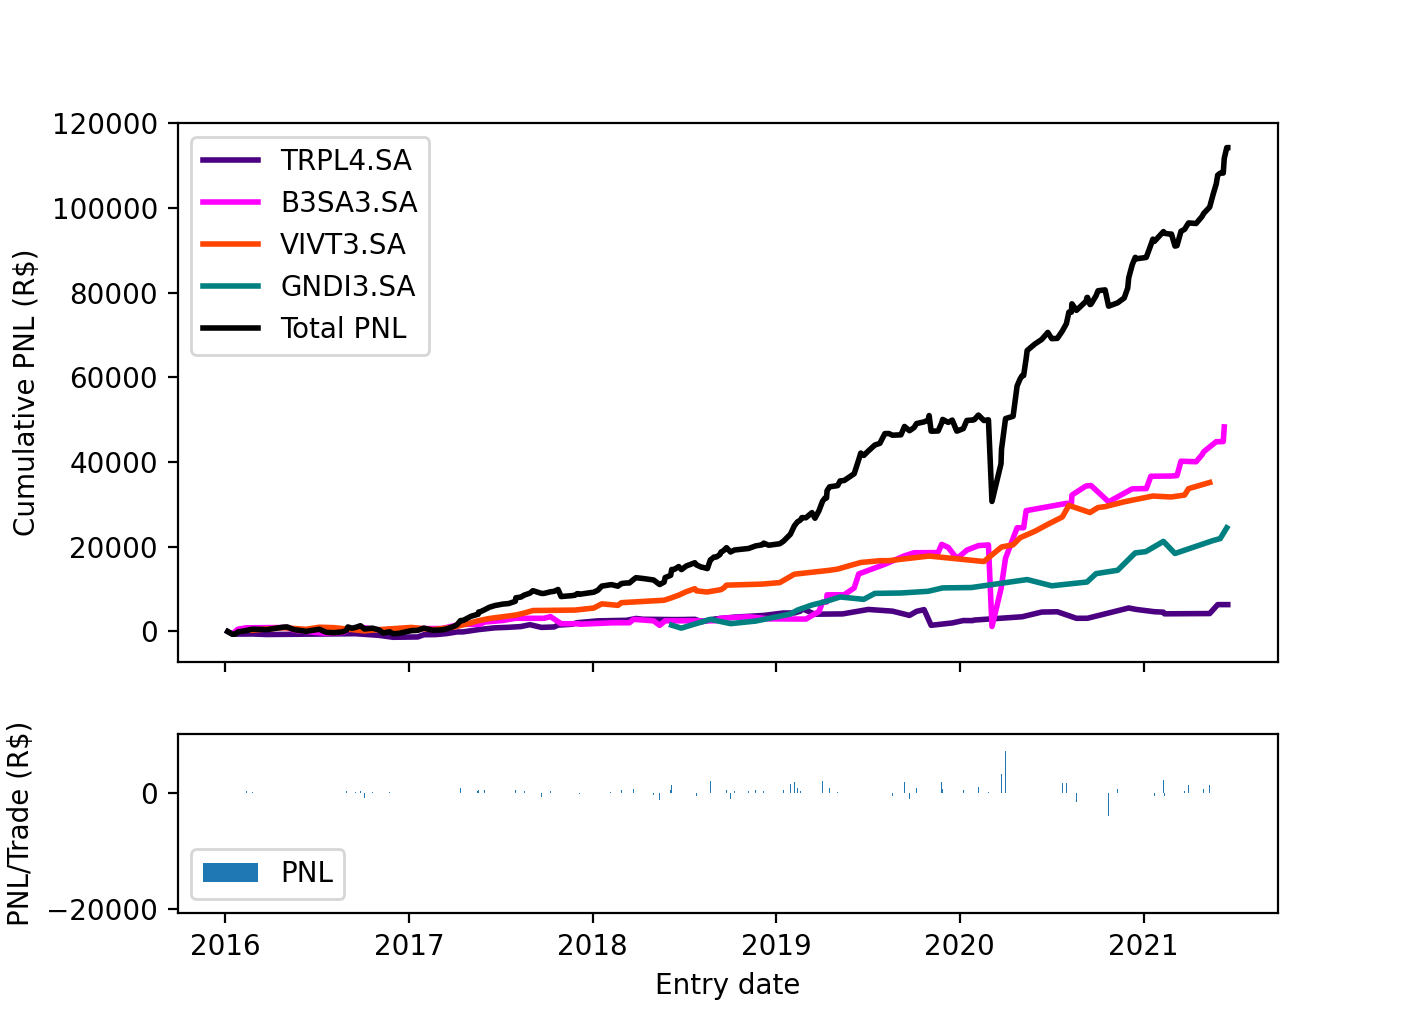

In [62]:
trader.performance()